In [23]:
import gensim
import os
import codecs
import re
import string
import io
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [24]:
# formating corpus
os.chdir('/Users/7of9/Documents/Word2Vec/')
f = open('FOX/DocList.txt', 'r')
fox_list = f.readlines()
os.chdir('FOX/')
fox_files = []
for file in fox_list:
    file = file.split("\\")[0] + "/" + file.split("\\")[1]
    file = file.replace("\n", "")
    fox_files.append(file)


In [27]:
import nltk
from nltk.stem.porter import *

def words(text):
    regex = re.compile('[' + '–' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')   
    text = regex.sub(" ", text)
    words = text.split()
    wordsL = [word.lower() for word in words]
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in wordsL]
    return(stemmed)

In [29]:
# https://stackoverflow.com/questions/7691514/extracting-text-from-xml-using-python
# preparing corpus for Word2Vec
from xml.etree import cElementTree as ET
from bs4 import BeautifulSoup

#os.chdir('Raw/')
fox_docs = []
for text in fox_files[20:]:
    with open(text) as f:
        soup = BeautifulSoup(f, 'xml')
    content = soup.find_all('TEXT')
    fox_docs.append(words(str(content).replace('TEXT', '')))

In [50]:
# Creating Multiple Word2Vec Models
from gensim.models import Word2Vec

fox_models = []
for i in range(10):
    fox_models.append(Word2Vec(fox_docs, min_count=1, size=300))

In [51]:
# Difference in the vector for king from model 0 to model 1
np.subtract(fox_models[0]['king'],fox_models[1]['king'])

array([ 0.04063547,  0.01316679, -0.00557441, -0.06230384, -0.0132723 ,
       -0.02259594,  0.04358752,  0.03321808,  0.04466537,  0.08241895,
       -0.03553206,  0.05473089,  0.10403603, -0.04959665, -0.02707661,
        0.0314827 ,  0.04837343, -0.14079328,  0.02665066, -0.0482365 ,
        0.01357561,  0.0242806 , -0.12222427, -0.10770872, -0.04159199,
        0.12560417, -0.03541125, -0.15054551, -0.04977736, -0.09915876,
        0.08531117, -0.06451252, -0.0250667 , -0.00303152,  0.08958578,
        0.06255117, -0.01242691,  0.06055062, -0.02829386, -0.11695766,
        0.00347739,  0.00065887, -0.0292082 ,  0.00186145,  0.010423  ,
        0.07236429,  0.0345329 ,  0.00892127,  0.02496287,  0.02605209,
        0.13989684, -0.00429447, -0.00018508,  0.06162474, -0.07254846,
       -0.09879389, -0.04704352,  0.02212003,  0.01781655, -0.01520075,
       -0.07433799,  0.05223632, -0.09191015,  0.00018296, -0.02788164,
        0.04892144, -0.05730559, -0.0453511 , -0.03185068,  0.04

In [34]:
# words in model
words = list(fox_models[0].wv.vocab)
print(words)

['shovel', 'snow', 'can', 'take', 'a', 'toll', 'on', 'your', 'bodi', 'particularli', 'heart', 'the', 'american', 'associ', 'said', 'strenuou', 'activ', 'actual', 'increas', 'chanc', 'of', 'have', 'attack', 'and', 'expert', 'say', 'there', 'are', 'some', 'peopl', 'who', 'should', 'never', 'even', 'pick', 'up', 'dr', 'marc', 'gillinov', 'cleveland', 'clinic', '“peopl', 'coronari', 'arteri', 'diseas', 'not', 'perform', '”', '“it', 'trigger', 'it’', 'hard', 'work', 'cold', 'temperatur', 'also', 'contribut', 'to', 'risk', 'becaus', 'it', 'caus', 'tighten', 'blood', 'pressur', 'other', 'factor', 'includ', 'high', 'cholesterol', 'peripher', 'age', 'if', 'you', 'think', 'or', 'experienc', 'short', 'breath', 'discomfort', 'in', 'left', 'arm', 'chest', 'pain', 'seek', 'medic', 'attent', 'immedi', 'lot', 's', 'got', 'be', 'thi', 'sharp', 'knife', 'like', 'could', 'just', 'fact', 'most', 'common', 'descript', 'relat', 'is', 'might', 'feel', 'an', 'eleph', 'sit', 're', 'get', 'stop', 'that', 'put',

In [52]:
# Creating a measurement of distance between vectors for man and genius vs woman and genius
from scipy.spatial.distance import cosine

def bais_genius(model):
    man_diff = cosine(model['man'], model['geniu']) # Porter Stemmer for Genius
    woman_diff = cosine(model['woman'], model['geniu'])
    return man_diff - woman_diff

In [53]:
bais_genius_diffs = []
for model in fox_models:
    bais_genius_diffs.append(bais_genius(model))
bais_genius_diffs
# the word genius appears less than five times in this corpus so more variable 

[0.02350810170173645,
 0.08249592781066895,
 0.10686850547790527,
 0.08221328258514404,
 0.14302611351013184,
 0.12809205055236816,
 0.017285585403442383,
 0.11719155311584473,
 0.09974968433380127,
 0.02854815125465393]

In [54]:
# Creating a measurement of distance between vectors for man and scientific vs woman and scientific
def bais_scientific(model):
    man_diff = cosine(model['man'], model['scientif'])
    woman_diff = cosine(model['woman'], model['scientif'])
    return man_diff - woman_diff

In [55]:
bais_scientif_diffs = []
for model in fox_models:
    bais_scientif_diffs.append(bais_scientific(model))
bais_scientif_diffs

[0.09267503023147583,
 0.1108025312423706,
 0.08360707759857178,
 0.07212823629379272,
 0.05978953838348389,
 0.08282989263534546,
 0.07420730590820312,
 0.09893792867660522,
 0.09830725193023682,
 0.07714188098907471]

In [66]:
# variablity in models, the most similar word is never the same
for model in fox_models:
    results = model.most_similar(positive=['woman', 'geniu'], negative=['man'], topn=1)
    print(results)

[('need', 0.8607437610626221)]
[('galore—wil', 0.9423556327819824)]
[('puriti', 0.9095423221588135)]
[('cannot', 0.8990209102630615)]
[('enigma', 0.8811341524124146)]
[('pest', 0.9191004037857056)]
[('truli', 0.8875516653060913)]
[('selfish', 0.9042293429374695)]
[('purveyor', 0.8641253113746643)]
[('pretend', 0.8655644059181213)]


In [67]:
for model in fox_models:
    results = model.most_similar(positive=['woman', 'scientif'], negative=['man'], topn=1)
    print(results)

[('women’', 0.934119701385498)]
[('basal', 0.9424046874046326)]
[('literatur', 0.9356421232223511)]
[('document', 0.924622118473053)]
[('examin', 0.9318491220474243)]
[('literatur', 0.9414931535720825)]
[('statist', 0.9608193635940552)]
[('seattle’', 0.9278523921966553)]
[('examin', 0.9419289827346802)]
[('amus', 0.9347630143165588)]


In [68]:
for model in fox_models:
    results = model.most_similar(positive=['man', 'scientif'], negative=['woman'], topn=1)
    print(results)

[('engin', 0.9406636953353882)]
[('ikram', 0.9424094557762146)]
[('project', 0.9208171367645264)]
[('keppler', 0.9323422908782959)]
[('novarti', 0.9330419898033142)]
[('jehl', 0.9343219995498657)]
[('confirm', 0.945823073387146)]
[('ikram', 0.9446556568145752)]
[('ibrahim', 0.9341367483139038)]
[('mcinni', 0.9554709196090698)]


In [71]:
# loading a old model from the same corpus 
os.chdir('/Users/7of9/Documents/Word2Vec/')
old_model = Word2Vec.load('model.bin')

In [75]:
fox_models[0].wv.save_word2vec_format('fox_model'+'0'+'.bin')

In [79]:
fox_models[0].save

<bound method Word2Vec.save of <gensim.models.word2vec.Word2Vec object at 0x1a21c72860>>

In [80]:
fox_models_100 = []
for i in range(100):
    fox_models_100.append(Word2Vec(fox_docs, min_count=1, size=300))

In [86]:
bais_genius_diffs_100 = []
for model in fox_models_100:
    bais_genius_diffs_100.append(bais_genius(model))

In [82]:
max(bais_genius_diffs_100)

0.16247719526290894

In [83]:
min(bais_genius_diffs_100)

-0.030609816312789917

In [85]:
np.std(bais_genius_diffs_100)

0.03566310574402655

In [88]:
np.var(bais_genius_diffs_100)

0.0012718571113096192

In [100]:
bais_scientif_diffs_100 = []
for model in fox_models_100:
    bais_scientif_diffs_100.append(bais_scientific(model))

In [101]:
max(bais_scientif_diffs_100)

0.15680259466171265

In [102]:
min(bais_scientif_diffs_100)

0.03328913450241089

In [103]:
np.std(bais_scientif_diffs_100)

0.026718195016273597

In [104]:
np.var(bais_scientif_diffs_100)

0.0007138619449276273

In [105]:
with open('fox_models_100_scientif_diffs.txt', 'w') as f:
    for diff in bais_scientif_diffs_100:
        f.write(str(diff))
        f.write("\n")

In [106]:
for i in range(100):
    fox_models_100.append(Word2Vec(fox_docs, min_count=1, size=300)) # now it has 200

In [107]:
for model in fox_models_100[100:]:
    bais_genius_diffs_100.append(bais_genius(model))
    bais_scientif_diffs_100.append(bais_scientific(model))

In [108]:
with open('fox_models_100_scientif_diffs.txt', 'w') as f:
    for diff in bais_scientif_diffs_100[100:]:
        f.write(str(diff))
        f.write("\n")

In [109]:
with open('fox_models_100_genius_diffs.txt', 'w') as f:
    for diff in bais_genius_diffs_100:
        f.write(str(diff))
        f.write("\n")

In [112]:
len(bais_scientif_diffs_100)

200

In [110]:
# Changes with 200 distributions
max(bais_scientif_diffs_100) # was 0.15680259466171265

0.1760689616203308

In [111]:
min(bais_scientif_diffs_100) # was 0.03328913450241089 (same)

0.03328913450241089

In [113]:
np.std(bais_scientif_diffs_100) # was 0.026718195016273597

0.028073732344559763

In [115]:
np.var(bais_scientif_diffs_100) # was 0.0007138619449276273

0.0007881344477539809

In [116]:
# Changes with 200 distributions
max(bais_genius_diffs_100) # was 0.16247719526290894

0.2145942747592926

In [117]:
min(bais_genius_diffs_100) # was 0.03328913450241089

-0.030609816312789917

In [118]:
np.std(bais_genius_diffs_100) # was 0.03566310574402655

0.038979631479938666

In [119]:
np.var(bais_genius_diffs_100) # was 0.0012718571113096192

0.0015194116703118254

In [123]:
scientif_diffs = []
for i in range(200):
    for j in range(200):
        if i != j:
            scientif_diffs.append(cosine(fox_models_100[i]['scientif'], fox_models_100[j]['scientif']))

In [125]:
max(scientif_diffs)

0.09829330444335938

In [126]:
min(scientif_diffs)

0.0018343329429626465

In [127]:
np.std(scientif_diffs)

0.014443872480739127

In [128]:
np.var(scientif_diffs)

0.00020862545223985306

In [132]:
women_diffs = []
for i in range(200):
    for j in range(200):
        if i != j:
            women_diffs.append(cosine(fox_models_100[i]['women'], fox_models_100[j]['women']))

In [133]:
max(women_diffs)

0.22022521495819092

In [134]:
min(women_diffs)

0.0046340227127075195

In [135]:
np.std(women_diffs)

0.031498931645416554

In [136]:
np.var(women_diffs)

0.0009921826948026244

In [137]:
np.std(scientif_diffs) - np.std(women_diffs)

-0.018680965273920977

In [140]:
np.var(scientif_diffs) - np.var(women_diffs)

-0.0008278824329018328

In [138]:
max(scientif_diffs) - max(women_diffs)

-0.1396620273590088

In [139]:
min(scientif_diffs) - min(women_diffs)

0.008727729320526123

In [141]:
# saving data
with open('scientif_diffs.txt', 'w') as f:
    for diff in scientif_diffs:
        f.write(str(diff))
        f.write("\n")

In [142]:
with open('women_diffs.txt', 'w') as f:
    for diff in women_diffs:
        f.write(str(diff))
        f.write("\n")

In [143]:
woman_diffs = []
for i in range(200):
    for j in range(200):
        if i != j:
            woman_diffs.append(cosine(fox_models_100[i]['woman'], fox_models_100[j]['woman']))

In [144]:
max(woman_diffs)

0.2022518515586853

In [145]:
min(woman_diffs)

0.006748974323272705

In [146]:
np.std(woman_diffs)

0.02433671712343692

In [147]:
np.var(woman_diffs)

0.0005922758003461878

In [150]:
max(woman_diffs) - max(women_diffs)

-0.017973363399505615

In [151]:
min(woman_diffs) - min(women_diffs)

0.0021149516105651855

In [152]:
np.std(woman_diffs) - np.std(women_diffs)

-0.007162214521979633

In [153]:
np.var(woman_diffs) - np.var(women_diffs)

-0.00039990689445643655

In [154]:
with open('woman_diffs.txt', 'w') as f:
    for diff in woman_diffs:
        f.write(str(diff))
        f.write("\n")

(array([8.600e+01, 6.020e+02, 1.546e+03, 2.178e+03, 2.694e+03, 3.614e+03,
        5.988e+03, 7.484e+03, 6.532e+03, 4.380e+03, 2.406e+03, 1.164e+03,
        5.620e+02, 2.460e+02, 1.460e+02, 8.400e+01, 6.000e+01, 1.800e+01,
        6.000e+00, 4.000e+00]),
 array([0.00674897, 0.01652412, 0.02629926, 0.03607441, 0.04584955,
        0.05562469, 0.06539984, 0.07517498, 0.08495013, 0.09472527,
        0.10450041, 0.11427556, 0.1240507 , 0.13382584, 0.14360099,
        0.15337613, 0.16315128, 0.17292642, 0.18270156, 0.19247671,
        0.20225185]),
 <a list of 20 Patch objects>)

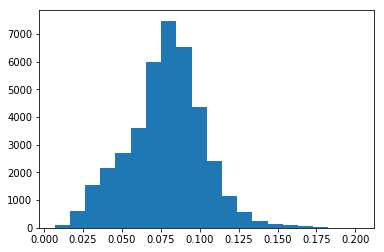

In [172]:
# Distributions of Differnce between models vectors for the word 'woman', 200 iterations
from matplotlib.pyplot import hist

hist(woman_diffs, bins=20)
# word count for woman is 171

(array([ 388., 1614., 1478., 1106., 1862., 2998., 4816., 7432., 6728.,
        4448., 2724., 1700., 1060.,  610.,  376.,  230.,  128.,   66.,
          20.,   16.]),
 array([0.00463402, 0.01541358, 0.02619314, 0.0369727 , 0.04775226,
        0.05853182, 0.06931138, 0.08009094, 0.0908705 , 0.10165006,
        0.11242962, 0.12320918, 0.13398874, 0.1447683 , 0.15554786,
        0.16632742, 0.17710698, 0.18788654, 0.1986661 , 0.20944566,
        0.22022521]),
 <a list of 20 Patch objects>)

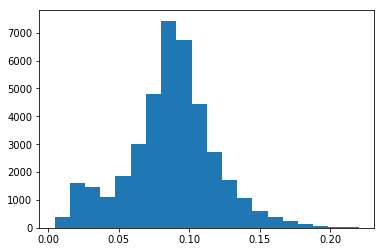

In [173]:
# Distributions of Differnce between models vectors for the word 'women'
hist(women_diffs, bins=20)
# word count for women 806

(array([ 3.,  1.,  6., 10., 14., 19., 14., 11., 17., 17., 16., 21., 24.,
        15.,  4.,  3.,  2.,  1.,  0.,  2.]),
 array([0.01336175, 0.01672182, 0.0200819 , 0.02344197, 0.02680204,
        0.03016211, 0.03352218, 0.03688225, 0.04024233, 0.0436024 ,
        0.04696247, 0.05032254, 0.05368261, 0.05704269, 0.06040276,
        0.06376283, 0.0671229 , 0.07048297, 0.07384304, 0.07720312,
        0.08056319]),
 <a list of 20 Patch objects>)

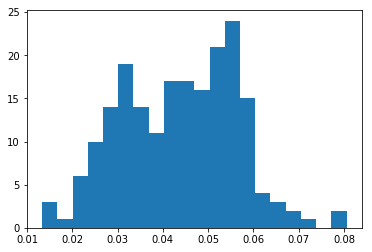

In [174]:
# Distributions of Differnce between models vectors for the word 'scientif'
hist(scientif_diffs, bins=20)
# word count for scientif is 137

(array([ 4.,  5.,  6.,  9., 10., 13., 21., 19., 27., 22., 14., 17.,  8.,
         8.,  4.,  3.,  0.,  6.,  1.,  3.]),
 array([0.03328913, 0.04042813, 0.04756712, 0.05470611, 0.0618451 ,
        0.06898409, 0.07612308, 0.08326207, 0.09040107, 0.09754006,
        0.10467905, 0.11181804, 0.11895703, 0.12609602, 0.13323501,
        0.140374  , 0.147513  , 0.15465199, 0.16179098, 0.16892997,
        0.17606896]),
 <a list of 20 Patch objects>)

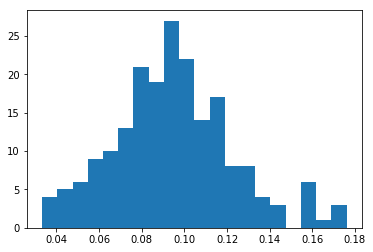

In [175]:
# Distribution of the amount of difference between each model's 
# distance between vectors for man and scientific vs woman and scientific (200 models)
hist(bais_scientif_diffs_100, bins =20)

(array([ 1.,  1.,  2.,  4.,  8., 14., 15., 25., 21., 19., 25., 24., 18.,
         9.,  6.,  6.,  0.,  1.,  0.,  1.]),
 array([-0.03060982, -0.01834961, -0.00608941,  0.0061708 ,  0.018431  ,
         0.03069121,  0.04295141,  0.05521162,  0.06747182,  0.07973202,
         0.09199223,  0.10425243,  0.11651264,  0.12877284,  0.14103305,
         0.15329325,  0.16555346,  0.17781366,  0.19007387,  0.20233407,
         0.21459427]),
 <a list of 20 Patch objects>)

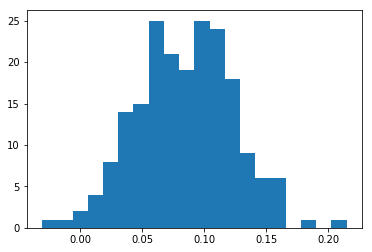

In [176]:
# Distribution of the amount of difference between each model's 
# distance between vectors for man and genius vs woman and genius (200 models)
hist(bais_genius_diffs_100, bins=20)

In [ ]:
# increase number of models 
for i in range(509):  # stoped at 509
    fox_models_100.append(Word2Vec(fox_docs, min_count=1, size=300)) # now it has 709

In [180]:
len(fox_models_100)

709

In [181]:
bais_genius_diffs_709  = bais_genius_diffs_100
bais_scientif_diffs_709 = bais_scientif_diffs_100 

for model in fox_models_100[200:]:
    bais_genius_diffs_709.append(bais_genius(model))
    bais_scientif_diffs_709.append(bais_scientific(model))

(array([ 1.,  4.,  5., 13., 20., 38., 61., 71., 80., 75., 80., 89., 62.,
        45., 31., 23.,  4.,  5.,  1.,  1.]),
 array([-0.04550368, -0.03249878, -0.01949388, -0.00648898,  0.00651591,
         0.01952081,  0.03252571,  0.04553061,  0.0585355 ,  0.0715404 ,
         0.0845453 ,  0.0975502 ,  0.11055509,  0.12355999,  0.13656489,
         0.14956979,  0.16257468,  0.17557958,  0.18858448,  0.20158938,
         0.21459427]),
 <a list of 20 Patch objects>)

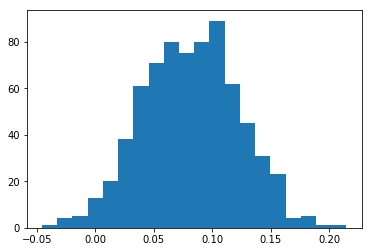

In [183]:
hist(bais_genius_diffs_709, bins=20)

(array([ 2.,  4., 10., 16., 34., 42., 66., 81., 98., 83., 73., 54., 54.,
        40., 23.,  9.,  8.,  6.,  2.,  4.]),
 array([0.02001894, 0.02782144, 0.03562394, 0.04342644, 0.05122894,
        0.05903144, 0.06683394, 0.07463644, 0.08243895, 0.09024145,
        0.09804395, 0.10584645, 0.11364895, 0.12145145, 0.12925395,
        0.13705646, 0.14485896, 0.15266146, 0.16046396, 0.16826646,
        0.17606896]),
 <a list of 20 Patch objects>)

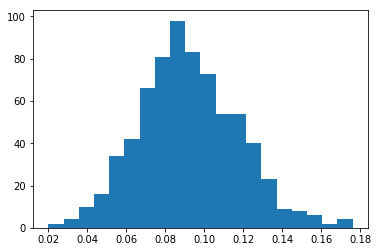

In [184]:
hist(bais_scientif_diffs_709, bins=20)

In [186]:
for i in range(291):  # stoped at 709 models
    fox_models_100.append(Word2Vec(fox_docs, min_count=1, size=300))

In [187]:
bais_genius_diffs_1000  = bais_genius_diffs_709
bais_scientif_diffs_1000 = bais_scientif_diffs_709 

for model in fox_models_100[709:]:
    bais_genius_diffs_1000.append(bais_genius(model))
    bais_scientif_diffs_1000.append(bais_scientific(model))

(array([ 1.,  1.,  4.,  1.,  4., 14., 10., 16., 31., 43., 56., 59., 81.,
        71., 82., 64., 92., 91., 66., 61., 35., 43., 27., 24., 12.,  5.,
         3.,  2.,  0.,  1.]),
 array([-0.05617249, -0.04714693, -0.03812137, -0.02909581, -0.02007025,
        -0.0110447 , -0.00201914,  0.00700642,  0.01603198,  0.02505754,
         0.0340831 ,  0.04310866,  0.05213422,  0.06115977,  0.07018533,
         0.07921089,  0.08823645,  0.09726201,  0.10628757,  0.11531313,
         0.12433869,  0.13336425,  0.1423898 ,  0.15141536,  0.16044092,
         0.16946648,  0.17849204,  0.1875176 ,  0.19654316,  0.20556872,
         0.21459427]),
 <a list of 30 Patch objects>)

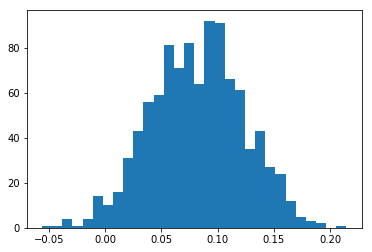

In [190]:
hist(bais_genius_diffs_1000, bins=30)

(array([ 1.,  3.,  4.,  8., 17., 11., 30., 35., 41., 59., 67., 72., 92.,
        82., 72., 75., 62., 48., 55., 37., 37., 30., 18., 15., 12.,  4.,
         6.,  1.,  2.,  4.]),
 array([0.02001894, 0.0252206 , 0.03042227, 0.03562394, 0.04082561,
        0.04602727, 0.05122894, 0.05643061, 0.06163228, 0.06683394,
        0.07203561, 0.07723728, 0.08243895, 0.08764061, 0.09284228,
        0.09804395, 0.10324562, 0.10844728, 0.11364895, 0.11885062,
        0.12405229, 0.12925395, 0.13445562, 0.13965729, 0.14485896,
        0.15006062, 0.15526229, 0.16046396, 0.16566563, 0.17086729,
        0.17606896]),
 <a list of 30 Patch objects>)

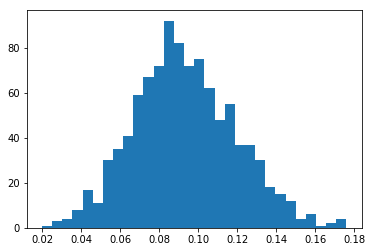

In [191]:
hist(bais_scientif_diffs_1000, bins=30)